# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [11]:
# student 1: Sean Greenzaid 5339
# student 2: Dor Mitnik 6035

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

ModuleNotFoundError: No module named 'pandas'

Train set preview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       13.170         18.66           85.98      534.6          0.11580   
1        9.667         18.49           61.49      289.1          0.08946   
2       20.090         23.86          134.70     1247.0          0.10800   
3        8.950         15.76           58.74      245.2          0.09462   
4       18.030         16.85          117.50      990.0          0.08947   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.12310         0.12260              0.07340         0.2128   
1           0.06258         0.02948              0.01514         0.2238   
2           0.18380         0.22830              0.12800         0.2249   
3           0.12430         0.09263              0.02308         0.1305   
4           0.12320         0.10900              0.06254         0.1720   

   mean fractal dimension  ...  worst texture  worst perimeter  worst are

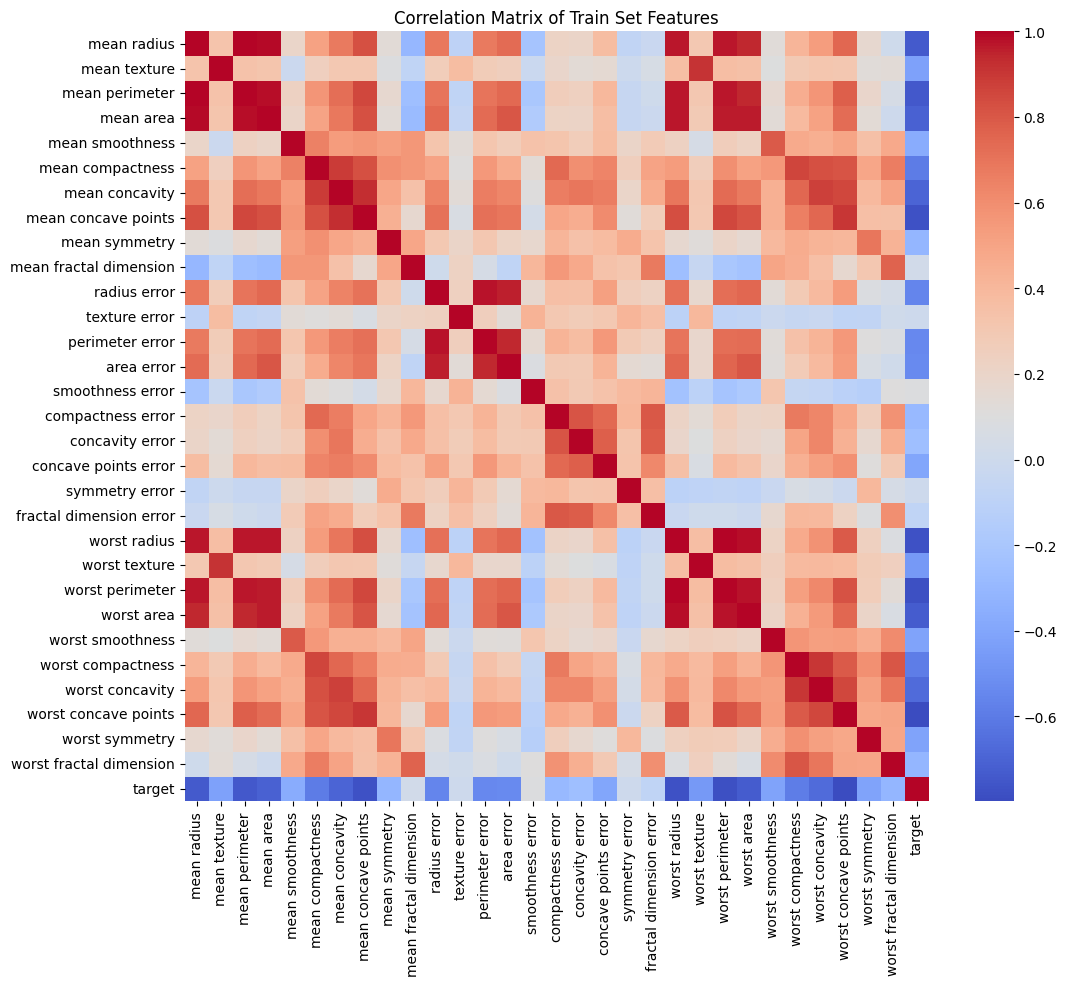

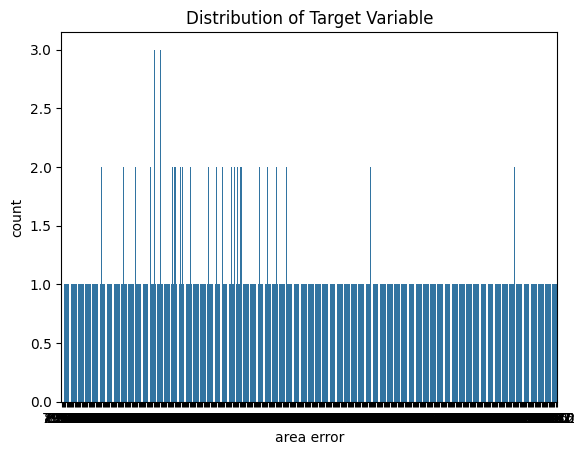

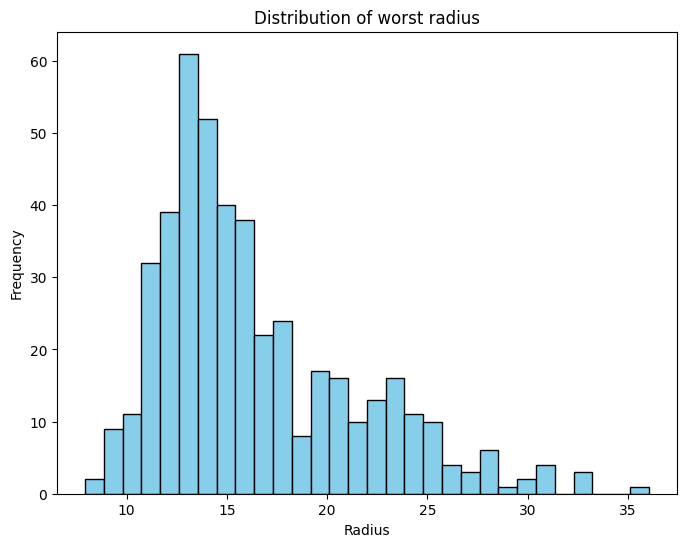

In [ ]:
# Load datasets
train = pd.read_csv(r"C:\Users\shong\Downloads\cancer_train.csv")
test = pd.read_csv(r"C:\Users\shong\Downloads\cancer_test.csv")

# Display first 5 rows of each dataset
print("Train set preview:")
print(train.head())

print("Test set preview:")
print(test.head())

# Exploratory Data Analysis (EDA)
# Display basic statistics of train dataset
print("\nTrain dataset statistics:")
print(train.describe())

# Visualizing correlations
plt.figure(figsize=(12,10))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Train Set Features')
plt.show()

# Visualizing area error
sns.countplot(data=train, x='area error')
plt.title('Distribution of Target Variable')
plt.show()

# Visualizing distribution of 'worst radius'
plt.figure(figsize=(8,6))
plt.hist(train['worst radius'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of worst radius')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.show()

# Visualizing relationships between features using pairplot
sns.pairplot(train, hue='target', diag_kind='kde')
plt.title('Pairplot of Train Set Features Colored by Target')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [ ]:
# Preprocessing - Using the 'target' column for diagnosis labels
X_train = train.drop(columns=['target'])
y_train = train['target']  # Assuming target contains 1 for malignant, 0 for benign
X_test = test.drop(columns=['target'])
y_test = test['target']

# Feature Engineering - Adding sum and mean of features as new columns
X_train['feature_sum'] = X_train.sum(axis=1)
X_train['feature_mean'] = X_train.mean(axis=1)
X_test['feature_sum'] = X_test.sum(axis=1)
X_test['feature_mean'] = X_test.mean(axis=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models and parameter grids
models = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier()
}

param_grids = {
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}
}

best_model = None
best_score = 0
results = []

# Grid search and evaluation using 5-fold cross-validation for each model and hyperparameter set
for model_name, model in models.items():
    grid = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1_macro')
    grid.fit(X_train_scaled, y_train)
    best_params = grid.best_params_
    best_cv_score = grid.best_score_
    results.append((model_name, best_params, best_cv_score))
    
    print(f"{model_name}: Best Params: {best_params}, Best CV F1 Macro Score: {best_cv_score}")
    
    if best_cv_score > best_score:
        best_model = grid.best_estimator_
        best_score = best_cv_score

# Summary of cross-validation results
results_df = pd.DataFrame(results, columns=['Model', 'Best Params', 'Best F1 Macro Score'])
print("\nSummary of cross-validation results:")
print(results_df)

# Testing the best model on the test set
y_pred = best_model.predict(X_test_scaled)
test_f1_score = f1_score(y_test, y_pred, average='macro')
print(f"Test F1 Macro Score for Best Model: {test_f1_score}")

SVC: Best Params: {'C': 10, 'kernel': 'rbf'}, Best CV F1 Macro Score: 0.974449306440782
RandomForest: Best Params: {'max_depth': 15, 'n_estimators': 50}, Best CV F1 Macro Score: 0.9650795133917478

Summary of cross-validation results:
          Model                            Best Params  Best F1 Macro Score
0           SVC             {'C': 10, 'kernel': 'rbf'}             0.974449
1  RandomForest  {'max_depth': 15, 'n_estimators': 50}             0.965080
Test F1 Macro Score for Best Model: 0.9693190993092311


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [ ]:
# Re-training on the entire Train dataset with the best combination of feature engineering, model, and hyperparameters

# Using the best version of feature engineering
# Feature Engineering - Adding sum and mean of features as new columns
X_train['feature_sum'] = X_train.sum(axis=1)
X_train['feature_mean'] = X_train.mean(axis=1)
X_test['feature_sum'] = X_test.sum(axis=1)
X_test['feature_mean'] = X_test.mean(axis=1)

# Feature scaling on the entire Train dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using the best model and hyperparameters found in GridSearchCV
print(f"Training the best model: {best_model}")

# Training the best model on the entire Train set
best_model.fit(X_train_scaled, y_train)

# Evaluating the model on the Test set
y_pred = best_model.predict(X_test_scaled)

# Displaying performance on the Test set
test_f1_score = f1_score(y_test, y_pred, average='macro')
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test F1 Macro Score for Best Model: {test_f1_score}")
print(f"Test Accuracy Score for Best Model: {test_accuracy}")

# Displaying detailed performance report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training the best model: SVC(C=10)
Test F1 Macro Score for Best Model: 0.9693190993092311
Test Accuracy Score for Best Model: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.96      0.98        80

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



## Part 5 - Apply on test and show model performance estimation

In [ ]:
# Predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Performance evaluation
print("\nTest set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display first 5 predictions
print("\nFirst 5 predictions on the test set:")
print(y_pred[:5])


Test set performance:
Accuracy: 0.9736842105263158
F1 Score (Macro): 0.9693190993092311

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.96      0.98        80

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114


First 5 predictions on the test set:
[1 1 0 1 1]
